# Stationarity

### Before testing: look  

For data to be stationary, it must have a dimension with temporal properties (the x-axis in the examples below being time), it must:
- Have a constant mean
- Have a constant variance
- Have no seasonality 

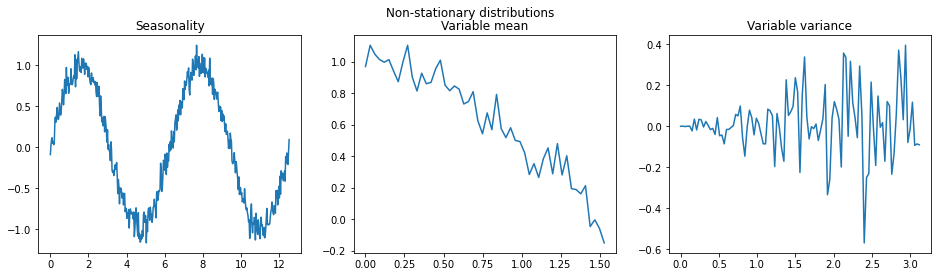

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time = np.arange(3.14 * 4, step=0.03)
seasonal = np.sin(time) + np.random.normal(0, 0.1, len(time))
var_mean = np.cos(time[:round(len(time)/8)]) + np.random.normal(0, 0.1, round(len(time)/8))
var_variance = np.random.normal(0, 0.1, len(time)) * time

fig, ax = plt.subplots(1, 3, figsize=(16, 4))

sns.lineplot(x=time, y=seasonal, ax=ax[0])
ax[0].set_title("Seasonality")

sns.lineplot(x=time[:round(len(time)/8)], y=var_mean, ax=ax[1])
ax[1].set_title("Variable mean")

sns.lineplot(x=time[:round(len(time)/4)], y=var_variance[:round(len(time)/4)], ax=ax[2])
ax[2].set_title("Variable variance")

fig.suptitle("Non-stationary distributions")
plt.plot();

### Augmented Dickey-Fuller Unit Root Test  

Null Hypothesis: Has a unit root (is not stationary)

In [2]:
import pandas as pd
from pathlib import Path
from datetime import date

df = pd.read_csv(Path("data") / "IBM_2006-01-01_to_2018-01-01.csv")
df.Date = pd.to_datetime(df.Date)

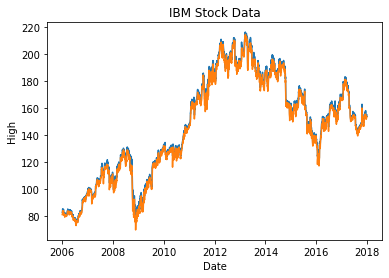

In [3]:
sns.lineplot(data=df, x="Date", y="High")
sns.lineplot(data=df, x="Date", y="Low")
plt.title("IBM Stock Data")
plt.plot();

In [4]:
from statsmodels.tsa.stattools import adfuller

stat, p, *_ = adfuller(df.High)

print(f"Statistic: {stat},\np-value: {p}")

Statistic: -1.862553028704006,
p-value: 0.34987709990504123


### Kwiatkowski-Phillips-Schmidt-Shin  

Null Hypothesis: Does not have a unit root (is stationary)

In [7]:
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore")

stat, p, *_ = kpss(df.High)

print(f"Statistic: {stat},\np-value: {p}")

Statistic: 5.450547556783375,
p-value: 0.01
